(100,) (100,)


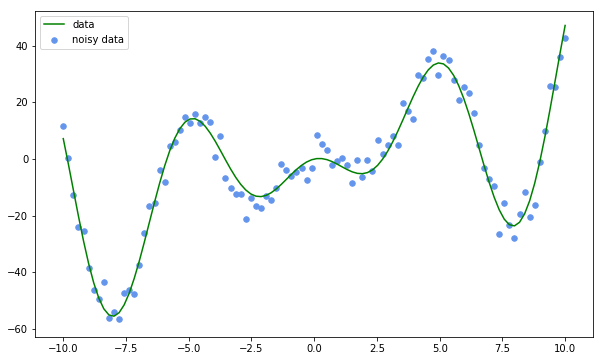

In [85]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model, datasets

# Generates a polynomial curve
n_samples = 1000

X = np.linspace(-10, 10, 100)
y = 2*X - 5*X*np.sin(X)

print(X.shape, y.shape)

# Add outlier data
y_noise = y + 5 * np.random.normal(size=y.shape)

plt.plot(X, y, 'g-', label='data')
plt.scatter(X, y_noise, color='cornflowerblue', marker='o', s=30, label='noisy data')
plt.legend(loc='best')
plt.show()

Populating the interactive namespace from numpy and matplotlib


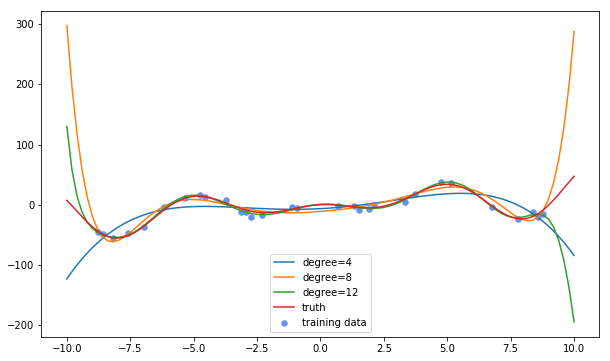

In [107]:
# Fit Polynomial regression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

X_train, X_test, y_train, y_test = train_test_split(X, y_noise, test_size=0.7)
X_test = np.sort(X_test)

for count, degree in enumerate(range(1, 4)):
    degree = degree * 4
    model = make_pipeline(PolynomialFeatures(degree), linear_model.Ridge())
    model.fit(X_train[:, np.newaxis], y_train)
    plt.plot(X, model.predict(X[:, np.newaxis]), label='degree=' + str(degree))
    
plt.plot(X, y, label='truth')
plt.scatter(X_train, y_train, color='cornflowerblue', marker='o', s=30, label='training data')
plt.legend(loc='best')
plt.show()